# Introduction

## Challenge Test


# Image Classification:

Image classification is the task of assigning to an image a label from a predefined set of
categories. A CNN [1] is intended to identify visual forms from images with least computation [2]. In the last few years, we saw a rapid progress in visual image processing systems, mostly due to advances of deep convolutional neural networks.



1. Y. LeCun, L. Bottu, Y. Bengio, Gradient-based learning applied to document recognition, Proceedings of the
IEEE 86 (11) (1998) 2278–2324, https://doi.org/10.1109/5.726791.
2. Alex Krizhevsky, Ilya Sutskever, Geoffrey E. Hinton, Imagenet classification with deep convolutional neural net-works, in: NIPS’12 Proceedings of the 25th InternationalConference on Neural Information ProcessingSystem,
vol. 1, 2012, pp. 1097–1105, arXiv:1311.2901.

# The properties of the dataset:

DataSet consistst of images of faces of different persons with certain characteristics. The task is to train a model able to predict whether certain image possess required chacteristics (encoded by the output labels) or not.
There is imbalance between the sample images in the dataset for men and women.

### Downloading the Data: 

DataSet is with the Email


After unzipping the file, you have three folders: train, validation, test and two text files relating to the train and validation labels. You can use both training and validation data for training and validation your model.

### Training and Validation Data

***Training Data:*** The "train" folder contains 1000 face images numbered from 000000 to 000999. These are color images in .jpg format with size of 80x80 pixels.

***Training Labels:*** The file named "label_train.txt" contains two columns. The first column list the 1000 labels (0 or 1) that are used to train your model. The second columns lists the corresponding binary representation of genders (0: woman, 1: Man)

***Validation Data:*** The "validation" folder contains 500 face images numbered from 000000 to 000500. These are color images in .jpg format with size of 80x80 pixels.

***Validation Labels:*** The file named "label_validation.txt" contains two columns. The first column list the 500 labels (0 or 1) that are used to validate your model. The second columns lists the corresponding binary representation of genders (0: woman, 1: Man)

### Test Data

 The "test" folder contains 500 face images numbered from 000000 to 000499. These are color images in .jpg format with size of 80x80 pixels.

### Libraryes imported

In [2]:
# To manipulate data and folder on PC
import glob, os, re

# To manipulate images
import cv2

# To process data
import numpy as np
import pandas as pd

# To implement CNN
import keras
from keras import models, layers, optimizers
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, roc_auc_score
import tensorflow as tf

# To verify that Tensorflow use the GPU instead the CPU to obtain more speed during the computation time fof the training.
print(tf.config.list_physical_devices('GPU'))

# to show graphics and images
import matplotlib.pyplot as plt 

# To generate random numbers
import random 

2023-06-06 22:17:25.296723: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-06 22:17:27.460169: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-06 22:17:27.485007: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Investigate the data

We want to understand the image set. We want to know the number of images in train set, the shape of the images and printing a random image in the folder. The same for Validation and test folders. 

First of all we need to create 2 subfolders in train and Validation, folders "0" and "1" where we put the images in "0" if the label is 0 in label_train.txt and "1" instead.

In [3]:
# Relative root path of the folder
dir_path = "DataSet/"

# Reading the label of train, read text file into pandas DataFrame. We don't consider the header of the txt because it doesn't exist, the same for the lines.
df = pd.read_csv(dir_path+"label_train.txt", sep=" ", header = None, index_col=False)
# store the labels and sex of each images
label_train = df[0]
sex_train = df[1]

#Same process for Validation set instead train set
df = pd.read_csv(dir_path+"label_validation.txt", sep=" ", header = None, index_col=False)
label_validation = df[0]
sex_validation = df[1]

How many man and woman in train and validation?

In [4]:
# NUmber of men and women in image set
nb_sexe = sex_train.value_counts()
print("TRAIN set")
print("Number of women : ",nb_sexe[0])
print("Number of man : ",nb_sexe[1])
print("Ratio : ",nb_sexe[0]/nb_sexe[1])
print("")

# NUmber of men and women in image set
nb_sexe = sex_validation.value_counts()
print("VALIDATION set")
print("Number of women : ",nb_sexe[0])
print("Number of man : ",nb_sexe[1])
print("Ratio : ",nb_sexe[0]/nb_sexe[1])


TRAIN set
Number of women :  581
Number of man :  419
Ratio :  1.3866348448687351

VALIDATION set
Number of women :  286
Number of man :  214
Ratio :  1.3364485981308412


We can observe that the ratio of women and man in each data set is similar, it can be a usefull information during the training phase to understand how the model have learned from the base.

Now we want show a random image and obtain the shape of an image.

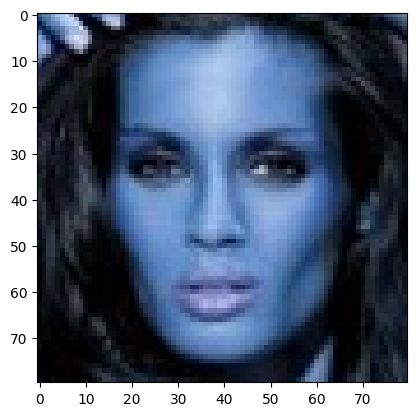

Shape of an image : (80, 80, 3)


In [5]:
# Taking a random image from the base
DATADIR = 'DataSet/train/0'
list_images = os.listdir(DATADIR)
index_img = random.randint(1,len(list_images))
img = list_images[index_img]

# Read and show a image with opencv
img_array = cv2.imread(os.path.join(DATADIR,img))
plt.imshow(img_array)
plt.show() 

# Obtain the size in pixels of an image and the shape (the 3 representing the RGB format of an image)
input_shape = img_array.shape
image_size = input_shape[:2]
print("Shape of an image :",img_array.shape)

### Data Preparation

Move image in the subfolders representing the corresponding label. If the data is already organized this code make nothing.

In [6]:
import shutil

list_folders = ["train/","Validation/"]

for name_folder in list_folders:
    # Source path
    source = dir_path+name_folder
    
    # Destination path
    destination_0 = source+"0"
    destination_1 = source+"1"

    # Create folder if it don't exist
    if os.path.exists(destination_0) == False:
        os.mkdir(destination_0)
    if os.path.exists(destination_1) == False:
        os.mkdir(destination_1)
    
    # Move the content of source to destination
    file_list = glob.glob(source+"/*.jpg")

    for img in file_list:
        index = int(os.path.basename(img).split('/')[-1].split(".")[0])
        if label_train[index] == 0 :
            shutil.move(img, destination_0)
        else :  
            shutil.move(img, destination_1)


### Building your Network

We build a CNN adopting a pre-trained architecture proposed by Tensorflow library.

In [23]:
# We initialize the model
model = models.Sequential()

# We add a first convolutional layer specifing the activation function of each node and we applied a maxpooling
model.add(layers.Conv2D(32, (3, 3), input_shape=input_shape))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# We add a second layer
model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# We add a third layer
model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# We add a fourth layer
model.add(layers.Conv2D(256, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# We add a fifth layer flattening the number of weights of precedent layer
model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Activation('relu'))

# Final layer to prevent overfitting with dropout and to obtain the output shape corresponding to the dimension of label.
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid')) # We choose sigmoid instead relu (the most popular) because it is well adpated to binary classification.

# We show the architecture obtained and the number of parameters generated
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 78, 78, 32)        896       
                                                                 
 activation_16 (Activation)  (None, 78, 78, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 39, 39, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 37, 37, 32)        9248      
                                                                 
 activation_17 (Activation)  (None, 37, 37, 32)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 18, 18, 32)       0         
 g2D)                                                 

We choose the optimizer to change the weights during the training. We choose Adam because it is the most plebiscitate but it can be interesting to compare with other optimizer alreaby implemented in Keras.

In [24]:
opt = keras.optimizers.Adam(learning_rate=1e-4)

We need to choose a loss function that quantify the difference between the true label and the label predicted obtained during the train phase. We choose the classic loss for binary labels, BinaryCrossentropy, but it can be interesting to adopt other loss function adapted for binary classification as hinge loss.

In [26]:

loss=tf.keras.losses.BinaryCrossentropy() 

Now we are ready to generate the CNN model.

In [27]:
model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])

### Data Preprocessing

We prepare data set for train and validation in a valid format for tensorflow framework. We decide to select train with batch having size of 32 images. We take all the pixels of the images (80x80) but if the accuracy of the model is not enough we can make data augmentation to improve the robustness of the model. To make data augmetation it is possible to random resize and cropping the images using opencv.

To process the data for tensorflow we use "image_dataset_from_directory()" function where we need to give :

- directory : path of folder containing data in subfolders representing the several categories.
- labels : we specify that the labels can be "inferred" from the structure of the subfolders
- label_mode : we specify how many categories we have to predict, in our case there are 2 cattegories and we put "binary"
- batch_size :  it's a hyperparameter of the training where we put a value that not slow the computation time and give enough information during the training
- image_size : we give the size of the data, in our case we have images with 80x80 pixels and we put this last.

In [28]:
train_ds = keras.utils.image_dataset_from_directory(
    directory="DataSet/train/",
    labels='inferred',
    label_mode='binary',
    batch_size=32           ,
    image_size=image_size)

Found 1000 files belonging to 2 classes.


The output represents the number of files in the folder and the number of labels (in our case there are 2 categories). Now we prepare the validation set 

In [29]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory='DataSet/Validation/',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=image_size)

Found 500 files belonging to 2 classes.


### Training your Model

Now we are ready to train a model with the train and validation data.

In [30]:
"""
We give the train and validation data to the function fit() that permit to train a model to make binary classification. 
We also fix the number of epochs (runtime) during the training that stop the process.
"""

history = model.fit(train_ds, epochs=70, validation_data=validation_ds)


Epoch 1/70


2023-06-06 22:30:30.482252: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1000]
	 [[{{node Placeholder/_4}}]]
2023-06-06 22:30:30.483292: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1000]
	 [[{{node Placeholder/_0}}]]


30/32 [===========================>..] - ETA: 0s - loss: 2.8442 - accuracy: 0.4802

2023-06-06 22:30:31.487511: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [500]
	 [[{{node Placeholder/_4}}]]
2023-06-06 22:30:31.488025: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [500]
	 [[{{node Placeholder/_0}}]]


32/32 [==============================] - 1s 20ms/step - loss: 2.7643 - accuracy: 0.4750 - val_loss: 0.7208 - val_accuracy: 0.5060
Epoch 2/70
32/32 [==============================] - 0s 15ms/step - loss: 0.7051 - accuracy: 0.5150 - val_loss: 0.6954 - val_accuracy: 0.5120
Epoch 3/70
32/32 [==============================] - 0s 15ms/step - loss: 0.6869 - accuracy: 0.5330 - val_loss: 0.6999 - val_accuracy: 0.4760
Epoch 4/70
32/32 [==============================] - 1s 15ms/step - loss: 0.6903 - accuracy: 0.5130 - val_loss: 0.6945 - val_accuracy: 0.4900
Epoch 5/70
32/32 [==============================] - 0s 15ms/step - loss: 0.6916 - accuracy: 0.5190 - val_loss: 0.6955 - val_accuracy: 0.4900
Epoch 6/70
32/32 [==============================] - 0s 14ms/step - loss: 0.6796 - accuracy: 0.5440 - val_loss: 0.6932 - val_accuracy: 0.5040
Epoch 7/70
32/32 [==============================] - 1s 15ms/step - loss: 0.6830 - accuracy: 0.5480 - val_loss: 0.6970 - val_accuracy: 0.4920
Epoch 8/70
32/32 [======

The model is trained, it is the moment to analyze the performances. We plot the accuracy and loss of the model during the training with train and validation set.

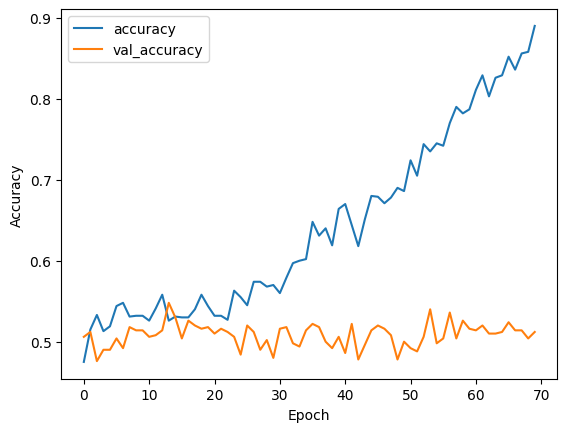

In [31]:
# Plot accuracy of the model with train and validation data
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

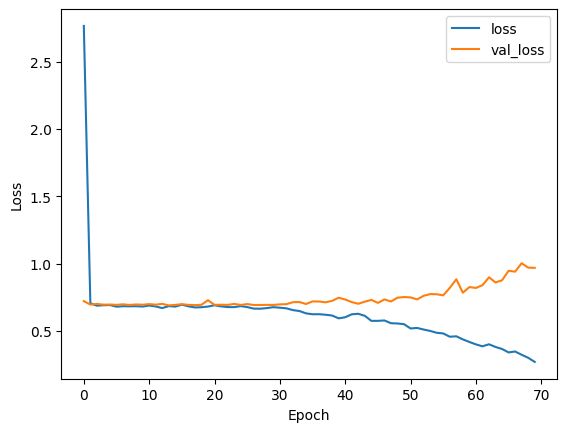

In [32]:
# Plot loss of the model with train and validation data
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

From now on it is necessary to understand if the model have learned from the base. In our case the answer is negative because the accuracy is very low and the loss too high for validation set.

From the graphics we can also observe that the model is overfitting the train data base, i.e. it is not robust with other data base with the same characteristics but different images.

We build a CNN adopting a pre-trained architecture proposed by Tensorflow library.

In [16]:
model2 = tf.keras.applications.ResNet50(weights=None, input_shape=input_shape, classes=2)
model2.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=opt, metrics=['accuracy'])
history2 = model2.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10


2023-06-06 22:18:35.015958: E tensorflow/compiler/xla/stream_executor/gpu/gpu_cudamallocasync_allocator.cc:306] gpu_async_0 cuMemAllocAsync failed to allocate 2435055616 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 312410112/4225695744
2023-06-06 22:18:35.016000: E tensorflow/compiler/xla/stream_executor/gpu/gpu_cudamallocasync_allocator.cc:311] Stats: Limit:                      2832596992
InUse:                       665041797
MaxInUse:                   1945545733
NumAllocs:                      258136
MaxAllocSize:               1300234240
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-06-06 22:18:35.016056: E tensorflow/compiler/xla/stream_executor/gpu/gpu_cudamallocasync_allocator.cc:63] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-06-06 22:18:35.016063: E tensorflow/compiler/xla/stream_execu

31/32 [============================>.] - ETA: 0s - loss: 0.4575 - accuracy: 0.5353

2023-06-06 22:18:43.256222: E tensorflow/compiler/xla/stream_executor/gpu/gpu_cudamallocasync_allocator.cc:306] gpu_async_0 cuMemAllocAsync failed to allocate 2474639360 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 203816960/4225695744
2023-06-06 22:18:43.256277: E tensorflow/compiler/xla/stream_executor/gpu/gpu_cudamallocasync_allocator.cc:311] Stats: Limit:                      2832596992
InUse:                       399620877
MaxInUse:                   1970373509
NumAllocs:                      292971
MaxAllocSize:               1300234240
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-06-06 22:18:43.256376: E tensorflow/compiler/xla/stream_executor/gpu/gpu_cudamallocasync_allocator.cc:63] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-06-06 22:18:43.256389: E tensorflow/compiler/xla/stream_execu

32/32 [==============================] - 17s 303ms/step - loss: 0.4579 - accuracy: 0.5350 - val_loss: 0.4994 - val_accuracy: 0.5140
Epoch 2/10
32/32 [==============================] - 6s 183ms/step - loss: 0.4063 - accuracy: 0.5000 - val_loss: 0.4619 - val_accuracy: 0.5140
Epoch 3/10
32/32 [==============================] - 6s 183ms/step - loss: 0.2814 - accuracy: 0.5110 - val_loss: 0.3524 - val_accuracy: 0.5160
Epoch 4/10
32/32 [==============================] - 6s 182ms/step - loss: 0.2656 - accuracy: 0.5050 - val_loss: 0.2562 - val_accuracy: 0.4860
Epoch 5/10
32/32 [==============================] - 6s 183ms/step - loss: 0.2644 - accuracy: 0.4910 - val_loss: 0.2549 - val_accuracy: 0.5140
Epoch 6/10
32/32 [==============================] - 6s 181ms/step - loss: 0.2627 - accuracy: 0.4870 - val_loss: 0.2580 - val_accuracy: 0.5140
Epoch 7/10
32/32 [==============================] - 6s 182ms/step - loss: 0.2608 - accuracy: 0.4860 - val_loss: 0.2532 - val_accuracy: 0.5140
Epoch 8/10
32/32

We want compare the two models trained and verify if one of them have good performances. For this we compare loss and accuracy at the last epochs.

In [33]:
print("Manual CNN")
model.evaluate(train_ds, verbose=2)
model.evaluate(validation_ds, verbose=2)
print("RedNet50")
model2.evaluate(train_ds, verbose=2)
model2.evaluate(validation_ds, verbose=2)

Manual CNN
32/32 - 0s - loss: 0.1971 - accuracy: 0.9590 - 184ms/epoch - 6ms/step
16/16 - 0s - loss: 0.9681 - accuracy: 0.5120 - 110ms/epoch - 7ms/step
RedNet50
32/32 - 1s - loss: 0.2587 - accuracy: 0.5150 - 1s/epoch - 44ms/step
16/16 - 1s - loss: 0.2585 - accuracy: 0.5140 - 719ms/epoch - 45ms/step


[0.25854286551475525, 0.5139999985694885]

Normally we can improve the analysis  verifyng the robustness of model, speed of convergence, memory size of CNN architecture, the confucio matrix, the evolution of learning rate of the optimizer and so on. We don't put these analysis in this code because the loss and accuracy are so poor or overfitted that it is necessary to find a better CNN architecture or a better strategy to increase train data to obtain better prediction.

### Accuracy by gender for Validation DataSet

To obtain the accuracy by gender we need create folder "Validation_with_sex" including images divided in 2 subfolders, one for women and one for men.

In [48]:

name_folder = "Validation/"
# Source path
source = dir_path+name_folder
new_source = dir_path+"Validation_with_sex/"
if os.path.exists(new_source) == False:
    os.mkdir(new_source)


# Destination path
destination_0 = new_source+"0" # women
destination_1 = new_source+"1" # men

if os.path.exists(destination_0) == False:
    os.mkdir(destination_0)
if os.path.exists(destination_1) == False:
    os.mkdir(destination_1)

# Take image of validation set 
file_list = glob.glob(dir_path+"RAW_Validation/*.jpg")

# Move the content of source to destination
for img in file_list:
    index = int(os.path.basename(img).split('/')[-1].split(".")[0])
    if sex_validation[index] == 0 :
        shutil.copy(img, destination_0)
    else :  
        shutil.copy(img, destination_1)


We applied the model to the Validation data set and we compare the label predicted with the new label represented by the sex of the person in images.

In [35]:
validationSEX_ds = keras.utils.image_dataset_from_directory(
    directory='DataSet/Validation_with_sex',
    labels="inferred",
    label_mode='binary',
    batch_size=32,
    image_size=image_size)

test_loss, test_acc = model.evaluate(validationSEX_ds, verbose=2)

Found 500 files belonging to 2 classes.
16/16 - 0s - loss: 1.0775 - accuracy: 0.4380 - 119ms/epoch - 7ms/step


2023-06-06 22:34:31.752652: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [500]
	 [[{{node Placeholder/_0}}]]
2023-06-06 22:34:31.753480: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [500]
	 [[{{node Placeholder/_0}}]]


We remark that we don't obtain significant improvement in accuracy. This is natural because the model is trained in an other label that don't correspond to sex of images.

### Testing your Model

We can verify that the model give an output with the test data. Unfortunately we can't verify with the true label because we don't have this information for the test data. 

In [47]:
# test data
test_data = keras.utils.image_dataset_from_directory(
    directory='DataSet/test/',
    labels=None,
    label_mode=None,
    batch_size=32,
    image_size=image_size)

# make a prediction
ynew = model.predict(test_data)
# convert prediction in binary way
preds = model.predict(test_data)
preds[preds <= 0.5] = 0.
preds[preds > 0.5] = 1.

# verify that the conversion is correct
print(ynew[:3]) 
print(preds[:3])

Found 500 files belonging to 1 classes.
16/16 [==============================] - 0s 4ms/step
[[0.23288667]
 [0.07856297]
 [0.77481204]]
[[0.]
 [1.]
 [1.]]


2023-06-06 22:42:54.794304: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [500]
	 [[{{node Placeholder/_0}}]]
2023-06-06 22:42:54.794641: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [500]
	 [[{{node Placeholder/_0}}]]


### Preparing your file for Submission

We can find all the data necessary to ruin this code in the repository in the github https://github.com/GiulianoCalabrese/HiParis